In [183]:
import torch
import pickle
test_data = torch.load('data/test.pth')
with open('data/constraint.pkl','rb') as f:
    constraints = pickle.load(f) 

In [164]:
import numpy as np

In [165]:
len(test_data)

1000

In [253]:
triang,triple = constraints['constraints'][0]
all_c = triang + triple
intersections_tuples = []
intersections_points = []
for c1 in all_c:
    for c2 in all_c:
        intersection = set(c1[0]).intersection(set(c2[0]))
        if intersection in intersections_tuples + intersections_points:
            continue
        if len(intersection)==2:
            intersections_tuples.append(intersection)
        if len(intersection)==1:
            intersections_points.append(intersection)
        


[{'3', '4'}, {'4', '6'}, {'5', '6'}, {'3', '6'}, {'6', '7'}, {'2', '6'}]

In [211]:
def get_average_feature_size_for_ex(ex):
    cum = 0
    for i in range(len(ex)):
        cum += ex[i][1].norm()
    cum /= len(ex)
    return cum
for i,ex in enumerate(test_data):
    print(i,float(get_average_feature_size_for_ex(ex['points'])))

0 92.7229232788086
1 92.9883041381836
2 91.63482666015625
3 90.57596588134766
4 88.09174346923828
5 82.8647689819336
6 90.45195007324219
7 91.9672622680664
8 90.08480072021484
9 92.90975189208984
10 95.73432922363281
11 94.6197509765625
12 91.07160186767578
13 97.31986236572266
14 89.64447784423828
15 97.0658187866211
16 94.54806518554688
17 95.76974487304688
18 93.71253967285156
19 94.1404800415039
20 84.6135482788086
21 95.50888061523438
22 95.49004364013672
23 90.01053619384766
24 90.48331451416016
25 92.0970230102539
26 91.99958801269531
27 91.10466003417969
28 91.28728485107422
29 89.2131118774414
30 91.75994873046875
31 95.72162628173828
32 96.72386932373047
33 88.63195037841797
34 93.23908996582031
35 93.81224060058594
36 92.87821197509766
37 86.21138763427734
38 90.26741027832031
39 93.87928771972656
40 91.44134521484375
41 88.00782775878906
42 95.69339752197266
43 93.25434112548828
44 94.42003631591797
45 99.07709503173828
46 90.42396545410156
47 91.1737289428711
48 95.3601913

In [184]:
flat_constraint_features = []
for cl in constraints['features']:
    for f in cl:
        flat_constraint_features.append(f)
const_t = torch.stack(flat_constraint_features)
const_t.shape

torch.Size([50, 1024])

In [167]:
import scipy.linalg

In [185]:
from scipy.linalg import block_diag
def get_el_2_const_matrix_for_clas(cl):
    triang,triple = constraints['constraints'][cl]
    rows = []

    for c in triang:
        row = np.zeros(10)
        for i in  c[0]:
            row[int(i)-1] = 1
        rows.append(row)
    for c in triple:
        row = np.zeros(10)
        for i in  c[0]:
            row[int(i)-1] = 1
        rows.append(row)
    return np.stack(rows)
    
def get_el_2_const_matrix():
    blocks = []
    for i in range(5):
        block = get_el_2_const_matrix_for_clas(i)
        blocks.append(block)
    return block_diag(*blocks)
get_el_2_const_matrix().shape
        

(31, 50)

In [258]:
def get_const_2_cl_matrix():
    blocks = []
    for i in range(5):
        triang,triple = constraints['constraints'][i]
        num_c = len(triang)+len(triple)
        block = np.zeros((5,num_c))
        block[i,:] = 1/num_c
        blocks.append(block)
    return np.concatenate(blocks,axis=1)
get_const_2_cl_matrix().shape

(5, 31)

In [268]:
all_c = []
all_c_per_class = []
for i in range(5):
    triang,triple = constraints['constraints'][i]
    cs = triang+triple
    all_c_for_class = []
    for c in cs:
        renamed = [int(s)-1 + 10*i for s in c[0] ]
        all_c.append((renamed,c[1],c[2],i))
        all_c_for_class.append(renamed)
    all_c_per_class.append(all_c_for_class)
len(all_c)

31

In [290]:
all_c

[([2, 3, 0],
  (1.0, 0.7071067811865476, 0.7071067811865476),
  [[-1, 2], [1, 2], [0, 3]],
  0),
 ([4, 5, 3],
  (1.0, 0.4472135954999579, 0.6324555320336759),
  [[3, 2], [0, 1], [1, 2]],
  0),
 ([2, 5, 3],
  (0.7071067811865476, 0.7071067811865476, 1.0),
  [[-1, 2], [0, 1], [1, 2]],
  0),
 ([1, 6, 5],
  (1.0, 0.2773500981126146, 0.8770580193070293),
  [[-3, 2], [0, 0], [0, 1]],
  0),
 ([4, 6, 5],
  (1.0, 0.2773500981126146, 0.8770580193070293),
  [[3, 2], [0, 0], [0, 1]],
  0),
 ([8, 9, 7],
  (1.0, 0.7071067811865476, 0.7071067811865476),
  [[-1, -2], [1, -2], [0, -1]],
  0),
 ([2, 1, 5],
  (0.6324555320336759, 1.0, 0.4472135954999579),
  [[-1, 2], [-3, 2], [0, 1]],
  0),
 ([5, 6, 7], (1.0, 1.0), [[0, 1], [0, 0], [0, -1]], 0),
 ([12, 11, 10],
  (1.0, 0.7071067811865476, 0.7071067811865476),
  [[-1, 1], [1, 1], [0, 2]],
  1),
 ([12, 13, 11],
  (0.7071067811865476, 0.7071067811865476, 1.0),
  [[-1, 1], [0, 0], [1, 1]],
  1),
 ([14, 15, 13],
  (1.0, 0.7071067811865476, 0.7071067811865476)

In [295]:
def intersections_per_class(all_c,cc):
    intersections_tuples = []
    intersections_points = []
    matched = []
    for i1,c1 in enumerate(all_c):
        for i2,c2 in enumerate(all_c):
            intersection = set(c1).intersection(set(c2))
            if intersection in matched:
                continue
            if len(intersection)==2:
                intersections_tuples.append((intersection,(i1+cc,i2+cc)))
                matched.append(intersection)
            if len(intersection)==1:
                intersections_points.append((intersection,(i1+cc,i2+cc)))
                matched.append(intersection)
    return (intersections_tuples,intersections_points)
all_intersections1 = []
all_intersections2 = []
cc=0
for i in range(5):
    i2,i1 = intersections_per_class(all_c_per_class[i],cc)
    all_intersections2.append((i2))
    all_intersections1.append((i1))
    cc+=len(all_c_per_class[i])
all_intersections2

[[({2, 3}, (0, 2)),
  ({3, 5}, (1, 2)),
  ({4, 5}, (1, 4)),
  ({2, 5}, (2, 6)),
  ({5, 6}, (3, 4)),
  ({1, 5}, (3, 6))],
 [({11, 12}, (8, 9))],
 [({21, 29}, (13, 14))],
 [({30, 38}, (17, 18)),
  ({37, 38}, (17, 19)),
  ({34, 39}, (20, 21)),
  ({33, 39}, (21, 22))],
 [({41, 45}, (23, 24)),
  ({44, 45}, (23, 26)),
  ({42, 45}, (24, 25)),
  ({43, 45}, (25, 26)),
  ({42, 43}, (25, 30))]]

In [305]:
from collections import defaultdict
c_neigh_1 = defaultdict(list) 
for a in all_intersections1:
    for isc in a:
         c_neigh_1[isc[1][0]].append(isc[1][1])
c_neigh_1

defaultdict(list,
            {0: [1, 6],
             1: [3],
             5: [7],
             9: [10],
             10: [11, 12],
             18: [19],
             20: [22],
             23: [25],
             24: [30],
             25: [27]})

In [306]:
c_neigh_2 = defaultdict(list) 
for a in all_intersections2:
    for isc in a:
         c_neigh_2[isc[1][0]].append(isc[1][1])
c_neigh_2

defaultdict(list,
            {0: [2],
             1: [2, 4],
             2: [6],
             3: [4, 6],
             8: [9],
             13: [14],
             17: [18, 19],
             20: [21],
             21: [22],
             23: [24, 26],
             24: [25],
             25: [26, 30]})

In [188]:
constraints['constraints'][-1]

([(['5', '6', '2'],
   (0.7071067811865475, 0.7071067811865475, 1.0),
   [[-1, 0], [0, 0], [0, 1]]),
  (['3', '6', '2'],
   (0.7071067811865475, 0.7071067811865475, 1.0),
   [[1, 0], [0, 0], [0, 1]]),
  (['3', '4', '6'],
   (1.0, 0.7071067811865475, 0.7071067811865475),
   [[1, 0], [0, -1], [0, 0]]),
  (['5', '4', '6'],
   (1.0, 0.7071067811865475, 0.7071067811865475),
   [[-1, 0], [0, -1], [0, 0]]),
  (['9', '10', '4'],
   (1.0, 0.7071067811865476, 0.7071067811865476),
   [[-1, -2], [1, -2], [0, -1]])],
 [([1, 2, 6], (1.0, 1.0), [[0, 2], [0, 1], [0, 0]]),
  ([7, 5, 6], (1.0, 1.0), [[-2, 0], [-1, 0], [0, 0]]),
  ([8, 3, 4], (0.7071067811865475, 1.0), [[2, 0], [1, 0], [0, -1]])])

In [189]:
el_to_const.shape

torch.Size([31, 50])

In [190]:
el_to_const = torch.from_numpy(get_el_2_const_matrix().astype('float32')) 
const_to_class = torch.from_numpy(get_const_2_cl_matrix().astype('float32'))
clas_to_const = const_to_class.T

In [191]:
pos,features,labels = list(zip(*test_data[0]['points']))

In [192]:
feature_matrix = torch.stack(features).T

In [193]:
feature_matrix = torch.stack(features).T
feature_matrix_norm = feature_matrix / feature_matrix.norm(dim=0)
const_t_norm = (const_t.transpose(0,1)/const_t.norm(dim=1)).transpose(0,1)
res = torch.mm(const_t_norm, feature_matrix_norm)

## thresholds

In [223]:
t1 = 0.3
t2 = 0.8
t3 = 0.8
t4 = 0.3
t5 = 0.3
t6 = 0.1

In [231]:
import math

def find_the_match(best10_per_const):
    pass

def print_block(title,x):
    print('='*5, title)
    print(x)
    print('-'*20)
mismatches = []
def get_class(features,pos,debug=False):
    feature_matrix = torch.stack(features).T
    feature_matrix_norm = feature_matrix / feature_matrix.norm(dim=0)
    const_t_norm = (const_t.transpose(0,1)/const_t.norm(dim=1)).transpose(0,1)
    res = torch.mm(const_t_norm, feature_matrix_norm)

    res_masked = res.masked_fill(res < t1,0)
    #torch.sort(res_masked,dim=1,descending=True)
    max_vals,max_vals_ix = res_masked.max(dim=1)
    if debug:
        print_block('max vals',max_vals)
    cons_score = torch.mv(el_to_const,max_vals)
    if debug:
        print_block('cons_score',cons_score)
    cons_score_masked = cons_score.masked_fill(cons_score < t2,0)
    if debug:
        print_block('cons_score_masked',cons_score_masked)
    clas_score = torch.mv(const_to_class,cons_score_masked)
    if debug:
        print_block('clas_score',clas_score)
    clas_score_masked = (clas_score > t3).float()
    #return clas_score_masked
    const_back = torch.mv(clas_to_const,clas_score_masked)
    filtered_const = const_back * cons_score_masked
    if debug:
        print_block('filtered_const',filtered_const)
    res_bool = res > t1
    counts = torch.sum(res_bool.float(),dim=1).long() 
    sorted_res_masked,ixs = torch.sort(res_masked,dim=1,descending=True)

    choosed_points = []
    for i,c in enumerate(counts):
        scrs = sorted_res_masked[i][:c]
        ps = np.array(pos)[ixs[i][:c].numpy()]
        choosed_points.append((scrs,ps))
    choosed_points_np = np.array(choosed_points)
    idx = 0
    def calcDist(p1,p2):
        x1,y1 = p1
        x2,y2 = p2
        dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        return dist

    def get_score(p1,p2,p3,c,s1,s2,s3):
        ab = calcDist(p1,p2)
        bc = calcDist(p2,p3)
        ca = calcDist(p3,p1)
        max_d = np.max([ab,bc,ca])
        abn,bcn,can = ab/max_d,bc/max_d,ca/max_d

        mismatch = (1-(abn - c[0]))*(1-(bcn - c[1]))*(s1+s2+s3) 
        if len(c)==3:
            mismatch *= (1-(can - c[2]))

        if mismatch < t6:
            return 0
        else: return mismatch

    def get_best_score(candidates,c):
        # rewrite for better effectivity
        old_score = 0
        best10 = []
        for i1,_ in enumerate(candidates[0][0]):
            s1,p1 = candidates[0][0][i1],candidates[0][1][i1]
            for i2,_ in enumerate(candidates[1][0]):
                s2,p2 = candidates[1][0][i2],candidates[1][1][i2]
                for i3,_ in enumerate(candidates[2][0]):
                    s3,p3 = candidates[2][0][i3],candidates[2][1][i3]
                    score = get_score(p1,p2,p3,c,s1,s2,s3)
                    if score > old_score:
                        old_score = score
        return old_score,best10


    def get_score_for_constraint(c):
        candidates = choosed_points_np[c[0]]
        scre,best10 = get_best_score(candidates,c[1])
        return scre,best10

    best_c_scores = torch.zeros(len(filtered_const))
    best10_per_const = []
    for i,v in enumerate(filtered_const):
        if v > 0:
            scre,best10 = get_score_for_constraint(all_c[i])
            best10_per_const.append(best10)
            best_c_scores[i] = scre
        else:
            best10_per_const.append([])
    if debug:
        print_block('best_c_scores',best_c_scores)
    best_c_scores_masked = cons_score.masked_fill(best_c_scores < t4,0)
    if debug:
        print_block('best_c_scores_masked',best_c_scores_masked)
    clas_score_2 = torch.mv(const_to_class,best_c_scores_masked)
    if debug:
        print_block('clas_score_2',clas_score_2)
    #clas_score_2_masked = (clas_score_2 > t5).float()
    find_the_match(best10_per_const)
    return clas_score_2

In [232]:
pos,features,labels = list(zip(*test_data[501]['points']))

classs = get_class(features,pos).argmax()
classs

tensor(0.9305)
tensor(1.5905)
tensor(1.2248)
tensor(1.3728)
tensor(1.4085)
tensor(1.1562)
tensor(1.5289)
tensor(1.6187)
tensor(1.6381)
tensor(1.1944)
tensor(0.9018)
tensor(1.5274)
tensor(1.0478)
tensor(1.3840)
tensor(1.2700)
tensor(0.7161)
tensor(1.5023)
tensor(1.2497)
tensor(1.4964)
tensor(1.2916)
tensor(1.2633)
tensor(1.5010)
tensor(1.4409)
tensor(0.9046)
tensor(1.5002)
tensor(1.3172)
tensor(1.4871)
tensor(1.6882)
tensor(1.2790)
tensor(1.3856)
tensor(1.5554)
tensor(1.3540)
tensor(1.4628)
tensor(1.3927)
tensor(1.3492)
tensor(1.1112)
tensor(1.0069)
tensor(0.9585)
tensor(0.9741)
tensor(1.2876)
tensor(1.4647)
tensor(1.2076)
tensor(1.3187)
tensor(1.3516)
tensor(1.2862)
tensor(1.4962)
tensor(1.3090)
tensor(1.5052)
tensor(1.1181)
tensor(1.2611)
tensor(1.3547)
tensor(1.3818)
tensor(1.3012)
tensor(1.1579)
tensor(1.2597)
tensor(1.1459)
tensor(1.1162)
tensor(1.0664)
tensor(1.0342)
tensor(nan)
tensor(1.4692)
tensor(0.8381)
tensor(1.3941)
tensor(1.3658)
tensor(1.4148)
tensor(1.4076)
tensor(1.0069

/home/jan/miniconda3/envs/fastai/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in double_scalars


tensor(1.1047)
tensor(1.3613)
tensor(0.9372)
tensor(1.2644)
tensor(1.0420)
tensor(1.0740)
tensor(1.4485)
tensor(0.9944)
tensor(1.3041)
tensor(0.9246)
tensor(1.0769)
tensor(1.1164)
tensor(1.4328)
tensor(0.9258)
tensor(1.3795)
tensor(0.9733)
tensor(1.0160)
tensor(1.1366)
tensor(1.4207)
tensor(0.9613)
tensor(1.3664)
tensor(0.9813)
tensor(0.9991)
tensor(1.1196)
tensor(1.2857)
tensor(1.2065)
tensor(1.2961)
tensor(0.9809)
tensor(0.6728)
tensor(1.2439)
tensor(1.3799)
tensor(1.4236)
tensor(1.3274)
tensor(1.4374)
tensor(1.5775)
tensor(1.2145)
tensor(1.6065)
tensor(1.4305)
tensor(0.8086)
tensor(1.2899)
tensor(1.4785)
tensor(1.2124)
tensor(0.9300)
tensor(1.1427)
tensor(1.4315)
tensor(1.2030)
tensor(0.8984)
tensor(1.1826)
tensor(1.1341)
tensor(1.2558)
tensor(1.5875)
tensor(1.2252)
tensor(1.3697)
tensor(1.1686)
tensor(0.8770)
tensor(1.2050)
tensor(1.4396)
tensor(1.2358)
tensor(1.3065)
tensor(1.1677)
tensor(1.3175)
tensor(1.3027)
tensor(0.9699)
tensor(1.1908)
tensor(1.0606)
tensor(1.1676)
tensor(0.8

tensor(2)

In [196]:
ix = 205
pos,features,labels = list(zip(*test_data[ix]['points']))
print(get_class(features,pos,True).argmax(),test_data[ix]['class'])


===== max vals
tensor([0.0000, 0.3024, 0.0000, 0.3143, 0.3022, 0.0000, 0.0000, 0.0000, 0.0000,
        0.3392, 0.4216, 0.3396, 0.4093, 0.4113, 0.3666, 0.4124, 0.4061, 0.5725,
        0.4225, 0.3251, 0.3803, 0.6357, 0.4421, 0.3478, 0.3950, 0.4419, 0.3999,
        0.4118, 0.5327, 0.4016, 0.0000, 0.3362, 0.3833, 0.3759, 0.4827, 0.3917,
        0.3481, 0.3626, 0.0000, 0.3538, 0.3495, 0.3265, 0.0000, 0.5074, 0.3649,
        0.3629, 0.0000, 0.3297, 0.3872, 0.4616])
--------------------
===== cons_score
tensor([0.3143, 0.6165, 0.3143, 0.3024, 0.3022, 0.3392, 0.3024, 0.0000, 1.1705,
        1.1602, 1.1904, 1.3910, 1.1143, 1.4795, 1.4492, 1.4177, 1.3696, 0.3626,
        0.3362, 0.7106, 1.2282, 1.2124, 1.1131, 1.0543, 0.6893, 0.8703, 1.2352,
        1.3562, 1.0388, 0.7278, 0.8372])
--------------------
===== cons_score_masked
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.1705,
        1.1602, 1.1904, 1.3910, 1.1143, 1.4795, 1.4492, 1.4177, 1.3696, 0.0000,
        0.00

In [216]:
len(mismatches)

190

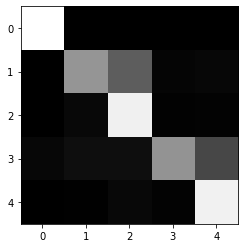

In [215]:
import matplotlib.pyplot as plt
plt.ion()
plt.imshow(confusion_m, cmap='gray', interpolation='none')

In [214]:
confusion_m

array([[200.,   0.,   0.,   0.,   0.],
       [  0., 117.,  73.,   4.,   6.],
       [  0.,   7., 188.,   2.,   3.],
       [  6.,  11.,  11., 116.,  56.],
       [  0.,   1.,   7.,   3., 189.]])

In [213]:
mismatches = []
confusion_m = np.zeros((5,5))


for i,ex in enumerate(test_data):
    pos,features,labels = list(zip(*ex['points']))
    predicted = int(get_class(features,pos).argmax())
    match = (ex['class'] == predicted)
    confusion_m[ex['class'],predicted] +=1
    if not match:
        mismatches.append(i)
    print(i,match)

/home/jan/miniconda3/envs/fastai/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in double_scalars


0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 True
13 True
14 True
15 True
16 True
17 True
18 True
19 True
20 True
21 True
22 True
23 True
24 True
25 True
26 True
27 True
28 True
29 True
30 True
31 True
32 True
33 True
34 True
35 True
36 True
37 True
38 True
39 True
40 True
41 True
42 True
43 True
44 True
45 True
46 True
47 True
48 True
49 True
50 True
51 True
52 True
53 True
54 True
55 True
56 True
57 True
58 True
59 True
60 True
61 True
62 True
63 True
64 True
65 True
66 True
67 True
68 True
69 True
70 True
71 True
72 True
73 True
74 True
75 True
76 True
77 True
78 True
79 True
80 True
81 True
82 True
83 True
84 True
85 True
86 True
87 True
88 True
89 True
90 True
91 True
92 True
93 True
94 True
95 True
96 True
97 True
98 True
99 True
100 True
101 True
102 True
103 True
104 True
105 True
106 True
107 True
108 True
109 True
110 True
111 True
112 True
113 True
114 True
115 True
116 True
117 True
118 True
119 True
120 True
121 True
122 True
123

In [65]:
import math
def calcDist(p1,p2):
    x1,y1 = p1
    x2,y2 = p2
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return dist

mismatches = []
def get_score(p1,p2,p3,c,s1,s2,s3):
    ab = calcDist(p1,p2)
    bc = calcDist(p2,p3)
    ca = calcDist(p3,p1)
    max_d = np.max([ab,bc,ca])
    abn,bcn,can = ab/max_d,bc/max_d,ca/max_d
    
    mismatch = (1-(abn - c[0]))*s1*s2 + (1-(bcn - c[1]))*s2*s3 
    if len(c)==3:
        mismatch += (1-(can - c[2]))*s3*s1
    mismatches.append(mismatch)
    if mismatch < 1:
        return 0
    else: return mismatch

def get_best_score(candidates,c):
    # rewrite for better effectivity
    old_score = 0
    for i1,_ in enumerate(candidates[0][0]):
        s1,p1 = candidates[0][0][i1],candidates[0][1][i1]
        for i2,_ in enumerate(candidates[1][0]):
            s2,p2 = candidates[1][0][i2],candidates[1][1][i2]
            for i3,_ in enumerate(candidates[2][0]):
                s3,p3 = candidates[2][0][i3],candidates[2][1][i3]
                score = get_score(p1,p2,p3,c,s1,s2,s3)
                if score > old_score:
                    old_score = score
    return old_score


def get_score_for_constraint(c):
    candidates = choosed_points_np[c[0]]
    return get_best_score(candidates,c[1])

best_c_scores = torch.zeros(len(filtered_const))
for i,v in enumerate(filtered_const):
    if v > 0:
        best_c_scores[i] = get_score_for_constraint(all_c[i])
best_c_scores_masked = cons_score.masked_fill(best_c_scores < t4,0)
clas_score_2 = torch.mv(const_to_class,best_c_scores_masked)
clas_score_2_masked = (clas_score_2 > t5).float()
clas_score_2_masked

/home/jan/miniconda3/envs/fastai/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


tensor([1., 0., 0., 0., 0.])

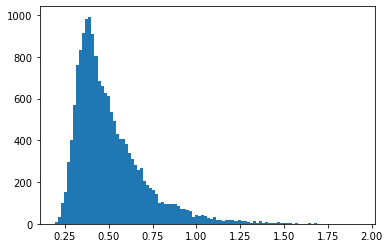

In [66]:
len(mismatches)
import matplotlib.pyplot as plt


plt.hist(mismatches, bins = 100)
plt.show()

In [67]:
best_c_scores
#clas_score_2

tensor([1.2480, 1.3334, 1.0669, 1.9293, 1.6127, 1.6831, 1.4751, 1.2649, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000])

In [156]:
res_masked.sort(dim=1,descending=True)

torch.return_types.sort(
values=tensor([[0.8421, 0.7489, 0.3651,  ..., 0.0000, 0.0000, 0.0000],
        [0.8584, 0.7035, 0.4028,  ..., 0.0000, 0.0000, 0.0000],
        [0.4829, 0.4375, 0.3959,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.5718, 0.4075, 0.3723,  ..., 0.0000, 0.0000, 0.0000],
        [0.3092, 0.3061, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.4621, 0.3586, 0.3549,  ..., 0.0000, 0.0000, 0.0000]]),
indices=tensor([[  1,   0,  37,  ...,  35,  36, 106],
        [  1,   0,  84,  ...,  36,  38, 106],
        [ 29,  84,   1,  ...,  37,  38, 106],
        ...,
        [  6,  27,  57,  ...,  39,  40, 106],
        [ 24,  55,  73,  ...,  37,  38, 106],
        [ 55,  77, 100,  ...,  37,  38, 106]]))

In [ ]:
%debug